In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import random
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas import Series

from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from sklearn.model_selection import train_test_split

In [2]:
# dataset united kingdom
#case = pd.read_csv('UK/case.csv')
#mobility = pd.read_csv('UK/mobility.csv')
#case.set_index('date', inplace=True)
#mobility.set_index('date', inplace=True)

# dataset indonesia (jakarta)
case = pd.read_csv('data/new/case_maret_july.csv')
mobility = pd.read_csv('data/new/mobility_maret_july.csv')
weather = pd.read_csv('data/new/weather_maret_july.csv')
case.set_index('date', inplace=True)
#weather.set_index('date', inplace=True)
mobility.set_index('date', inplace=True)

In [3]:
new_weather = weather.interpolate(method='spline', order=2)
new_weather.head()

new_weather.set_index('date', inplace=True)

In [4]:
data = pd.concat([case, new_weather], axis=1)
data.head()

,case,rh,avt,mxt,mnt
date,,,,,
2020-03-18,38,86.0,27.6,29.0,25.800000
2020-03-19,50,83.0,28.1,31.4,25.800000
2020-03-20,14,82.0,27.4,31.2,25.200000
2020-03-21,44,81.0,28.1,32.4,26.521978
2020-03-22,36,84.0,27.2,31.2,25.000000


In [5]:
data.shape

(423, 5)

In [6]:
train = data[:413]
train_exog = mobility[:413]
test = data[413:]
test_exog = mobility[413:]

In [7]:
model = VARMAX(train, exog=train_exog, order=(3, 1))
model_fit = model.fit(disp=False)
print(model_fit.summary())

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                    Statespace Model Results                                   
Dep. Variable:     ['case', 'rh', 'avt', 'mxt', 'mnt']   No. Observations:                  413
Model:                                     VARMAX(3,1)   Log Likelihood               -5197.954
                                           + intercept   AIC                          10695.907
Date:                                 Tue, 24 Aug 2021   BIC                          11299.424
Time:                                         12:22:57   HQIC                         10934.605
Sample:                                     03-18-2020                                         
                                          - 05-04-2021                                         
Covariance Type:                                   opg                                         
Ljung-Box (L1) (Q):      2.31, 0.00, 0.01, 0.04, 0.00   Jarque-Bera (JB):   585.84, 3.71, 24.17, 15.23, 7.60
Prob(Q):                 0.

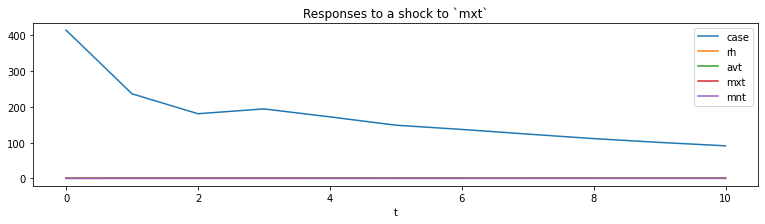

In [8]:
ax = model_fit.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `mxt`');

In [9]:
yhat = model_fit.forecast(steps=len(test_exog),exog=test_exog)
print(yhat)

                  case         rh        avt        mxt        mnt
2021-05-05  584.748538  73.403119  29.409216  33.374577  26.364582
2021-05-06  641.067928  75.020143  29.307453  32.908902  26.253852
2021-05-07  534.668090  73.983110  29.522596  32.788645  26.347476
2021-05-08  527.797951  73.943427  29.544984  33.150561  26.349663
2021-05-09  454.461267  73.803188  29.659454  33.250332  26.535248
2021-05-10  424.862221  73.691468  29.758867  33.086274  26.381842
2021-05-11  416.092123  73.623053  29.862980  33.302978  26.347895
2021-05-12  379.196506  73.906583  30.007190  33.447901  26.350218
2021-05-13  728.167252  77.007986  29.102721  32.433674  26.113543
2021-05-14  853.860693  77.820616  28.871790  32.189395  25.960822


C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


In [10]:
list_hasil = yhat['case'].tolist()
list_eval = test['case'].tolist()

In [11]:
rms = mean_squared_error(list_eval, list_hasil, squared=False)
rms

238.3411812327217

In [12]:
mse = mean_squared_error(list_eval, list_hasil)
mse

56806.518671409096

In [13]:
mae = mean_absolute_error(list_eval, list_hasil)
mae

216.5983062165084